#### Kết nối dữ liệu drive


In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#### khai báo thư viện


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

#### Đọc file dữ liệu


In [ ]:
df = pd.read_csv('drive/MyDrive/XuanTruong/MobilePrice/train.csv')

In [ ]:
corr = df.corr()
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


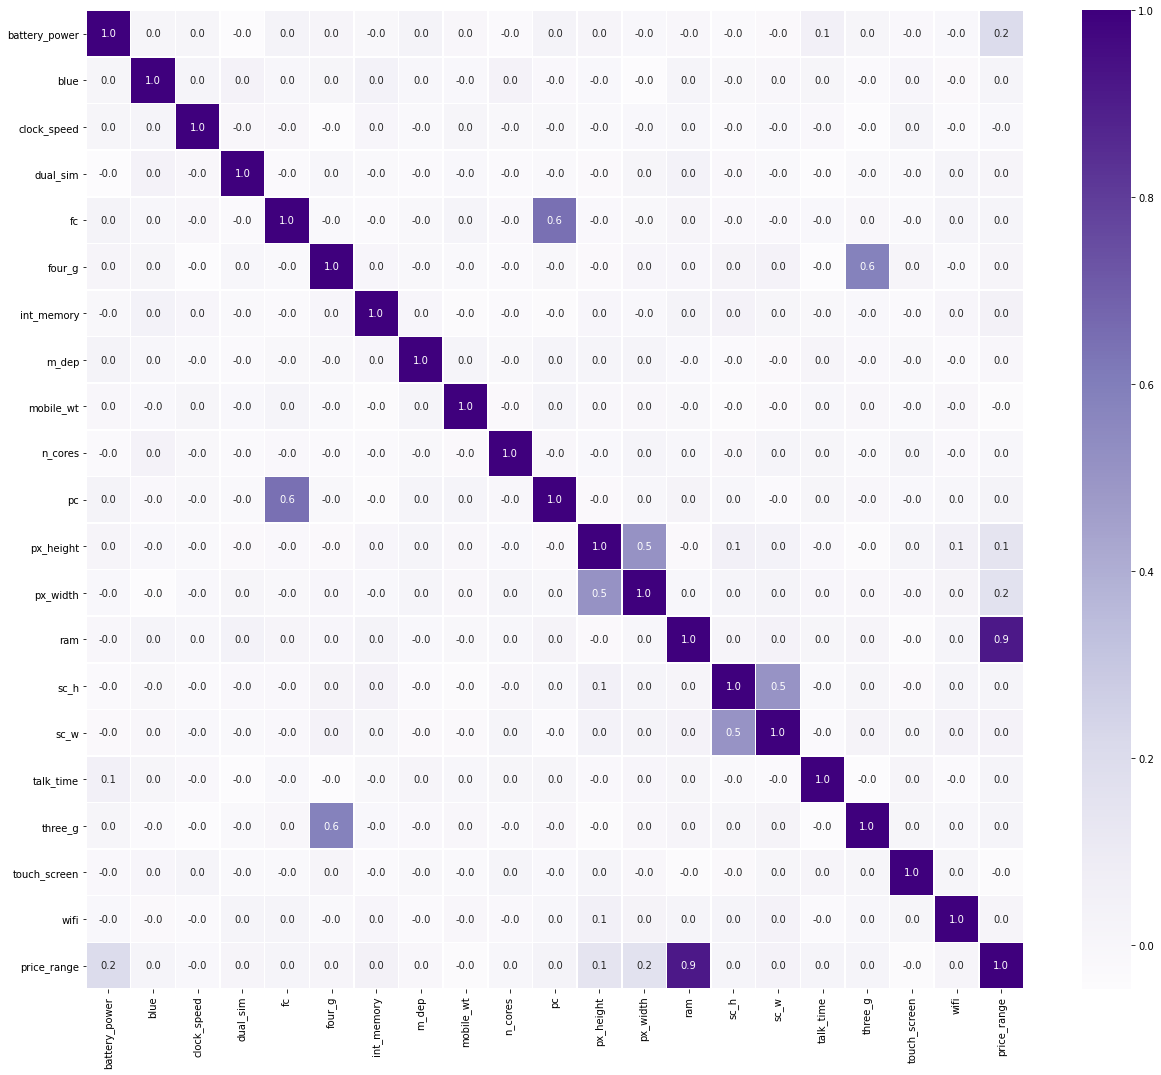

In [ ]:
f,ax = plt.subplots(figsize=(21, 18))
sns.heatmap(df.corr(),annot=True,cmap='Purples', linewidths=.5, fmt= '.1f',ax=ax)

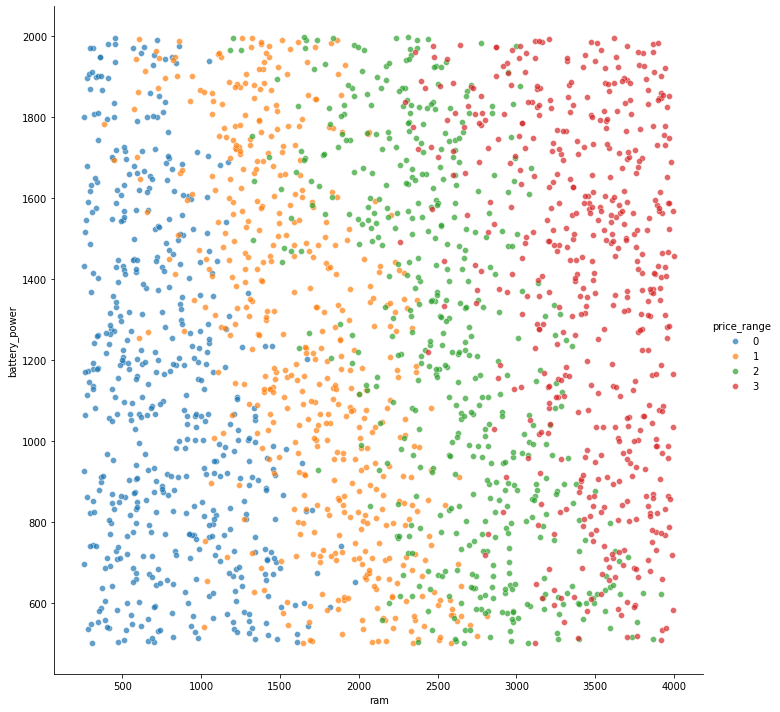

In [ ]:
g=sns.FacetGrid(df,hue='price_range',height=10,aspect= 1,)
g.map(sns.scatterplot, "ram", "battery_power", alpha=.7)
g.add_legend()

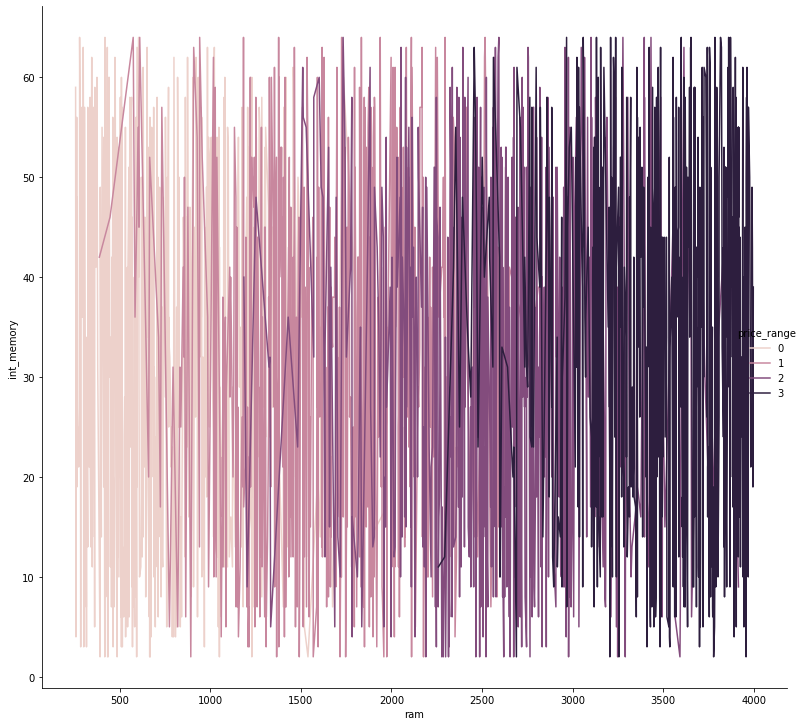

In [ ]:
g=sns.relplot(x='ram',y='int_memory',hue='price_range',kind='line', estimator=None,data=df,height=10)
g.add_legend()

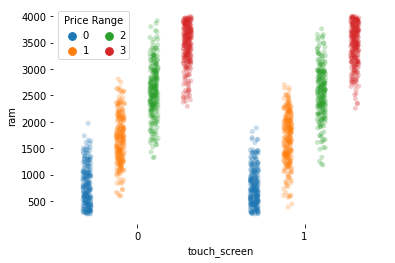

In [ ]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend( title="Price Range",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=2, frameon=True)

## SVM


#### tách dữ liệu

In [ ]:
y = df["price_range"].values
x_data=df.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

#### hiện bộ dữ liệu sau khi tách

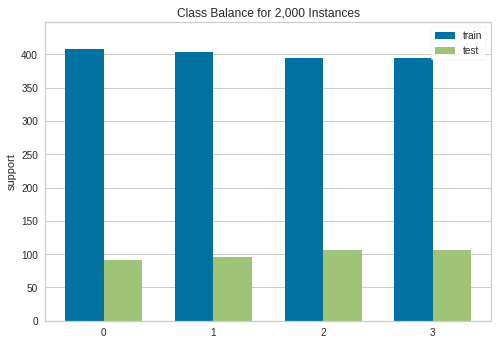

In [ ]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2, 3])
visualizer.fit(y_train, y_test)
visualizer.poof()


#### kết quả khi train lần đầu


In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.97125
test accuracy: 0.8375


## kiểm tra 5 thuộc tính tương quan cao nhất của data test và train với giá điện thoại



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
selector = SelectKBest(f_classif, k = 5)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']
x test features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']


#### dùng gridsearchCV để  tối ưu

In [ ]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [ ]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_new,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9637499999999999
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


In [ ]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm_model.fit(x_new,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.964375
test_accuracy:  0.9375


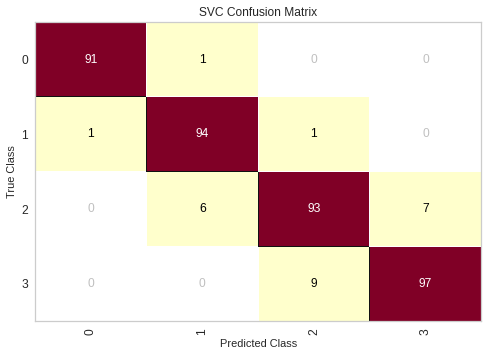

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm_model, classes=[0,1,2,3])
cm.fit(x_new, y_train)
cm.score(x_new_test, y_test)

cm.poof()

## KNN algorithm

In [ ]:
df2 = pd.read_csv('drive/MyDrive/XuanTruong/MobilePrice/train.csv')

In [ ]:
df2 = df2[['ram','battery_power','px_width','px_height','int_memory','price_range']]

In [ ]:
df2.head()

,ram,battery_power,px_width,px_height,int_memory,price_range
0,2549,842,756,20,7,1
1,2631,1021,1988,905,53,2
2,2603,563,1716,1263,41,2
3,2769,615,1786,1216,10,2
4,1411,1821,1212,1208,44,1


In [ ]:
x = df2.drop(['price_range'],axis=1)
y = df2['price_range']
x.head()

,ram,battery_power,px_width,px_height,int_memory
0,2549,842,756,20,7
1,2631,1021,1988,905,53
2,2603,563,1716,1263,41
3,2769,615,1786,1216,10
4,1411,1821,1212,1208,44


In [ ]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)
print('Length of train dataset: ',len(x_train))
print('Length of test dataset: ',len(x_test))

Length of train dataset:  1400
Length of test dataset:  600


In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_X_train = scaler.transform(x_train)
scaled_X_test = scaler.transform(x_test)

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(scaled_X_train,y_train)

y_predicted = knn_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

array([[141,  10,   0,   0],
       [ 21, 100,  14,   0],
       [  0,  20, 118,  13],
       [  0,   0,  23, 140]])

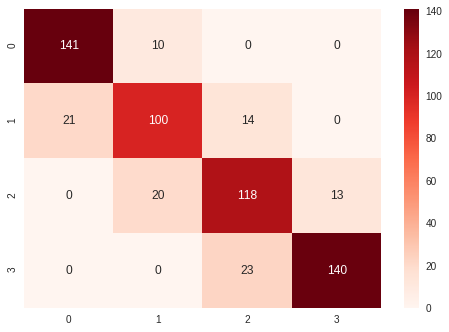

In [ ]:
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f')
plt.show()
